# Analisis basico de datos corona virus Guatemala 2020

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
dir_pacientes = '../data/pacientes.csv'
pacientes = pd.read_csv(dir_pacientes, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha_nacimiento","fecha_confirmacion", "fecha_recuperacion", "fecha_deceso"]
for col in cols_fecha:
    pacientes[col] = pd.to_datetime(pacientes[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(pacientes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9 non-null      int64         
 1   sexo                9 non-null      object        
 2   fecha_nacimiento    9 non-null      datetime64[ns]
 3   edad                9 non-null      int64         
 4   pais                9 non-null      object        
 5   departamento        9 non-null      object        
 6   enfermedad          9 non-null      object        
 7   grupo               9 non-null      int64         
 8   razon_infeccion     9 non-null      object        
 9   infectado_por       9 non-null      int64         
 10  fecha_confirmacion  9 non-null      datetime64[ns]
 11  fecha_recuperacion  0 non-null      datetime64[ns]
 12  fecha_deceso        1 non-null      datetime64[ns]
 13  estado              9 non-null      int64         
 14

In [17]:
# mostrar algunos datos
print(pacientes.head())

   id sexo fecha_nacimiento  edad         pais  departamento   enfermedad  \
0   1    m       1993-01-01    27    guatemala     guatemala  desconocido   
1   2    m       1935-01-01    85    guatemala     guatemala  desconocido   
2   3    m       1963-01-01    57    guatemala     guatemala  desconocido   
3   4    m       1988-01-01    32    guatemala     guatemala  desconocido   
4   5    f       1985-01-01    35  desconocido  Sacatepequez  desconocido   

   grupo                         razon_infeccion  infectado_por  \
0      1  Viaje Italia/Madrid/Bogota/SanSalvador            -99   
1      2              Viaje Espana/Suiza/Francia            -99   
2      3                     contacto paciente 2              2   
3    -99             Viaje Inglaterra/Nueva York            -99   
4    -99                         Viaje Australia            -99   

  fecha_confirmacion fecha_recuperacion fecha_deceso  estado  \
0         2020-03-13                NaT          NaT       0   
1     

# Estadisticas 

In [25]:
confirmados = pacientes['fecha_confirmacion'].value_counts().sort_index()
recuperados = pacientes['fecha_recuperacion'].value_counts().sort_index()
fallecidos = pacientes['fecha_deceso'].value_counts().sort_index()
print("Confirmados: {}".format(confirmados.sum()))
print("Recuperados: {}".format(recuperados.sum()))
print("Fallecidos: {}".format(fallecidos.sum()))

Confirmados: 9
Recuperados: 0
Fallecidos: 1


## Datos cumulativos y diarios 

Se muestran la cantidad de pacientes confirmados, recuperados y fallecidos a lo largo del tiempo.

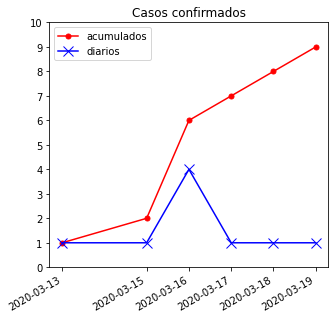

In [19]:
fig1 = plt.figure(figsize=(5,5))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Casos confirmados')
confirmados.cumsum().plot(ax = fig1ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
confirmados.plot(ax = fig1ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig1ax1.set_xticks(confirmados.index.to_list())
fig1ax1.set_yticks(range(confirmados.sum()+2))
fig1ax1.legend(loc="best")
fig1.savefig("../imgs/confirmados.png")

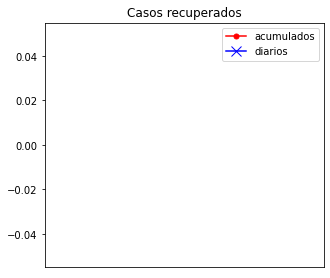

In [20]:
fig2 = plt.figure(figsize=(5,5))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Casos recuperados')
recuperados.cumsum().plot(ax = fig2ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
recuperados.plot(ax = fig2ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig2ax1.set_xticks(recuperados.index.to_list())
#fig2ax1.set_yticks((range(min(recuperados),max(recuperados)+2)))
fig2ax1.legend(loc = "best")
fig2.savefig("../imgs/recuperados.png")

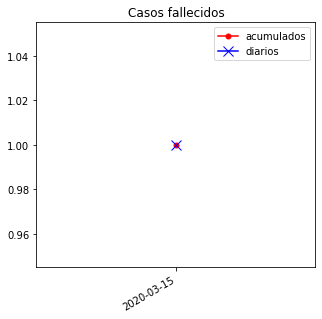

In [21]:
fig3 = plt.figure(figsize=(5,5))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Casos fallecidos')
fallecidos.cumsum().plot(ax = fig3ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
fallecidos.plot(ax = fig3ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig3ax1.set_xticks(fallecidos.index.to_list())
fig2ax1.set_yticks(range(fallecidos.sum()+2))
fig3ax1.legend(loc = 'best')
fig3.savefig("../imgs/fallecidos.png")

## Datos por sexo 
Pacientes confirmados, recuperados y fallecidos, agregados por sexo.

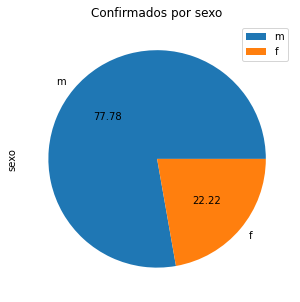

In [22]:
# Obtener casos confirmados
confirmados = pacientes[[ not pd.isna(i) for i in pacientes['fecha_confirmacion']]]
confirmados['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Confirmados por sexo')

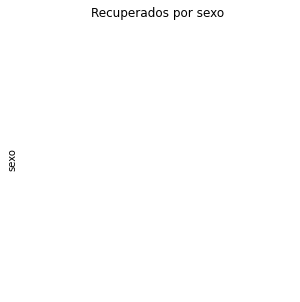

In [23]:
recuperados = pacientes[[ not pd.isna(i) for i in pacientes['fecha_recuperacion']]]
recuperados['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Recuperados por sexo')

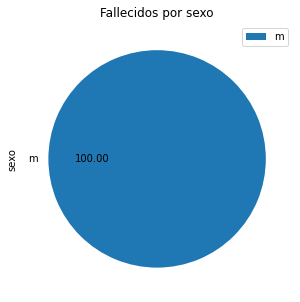

In [24]:
fallecidos = pacientes[[ not pd.isna(i) for i in pacientes['fecha_deceso']]]
fallecidos['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Fallecidos por sexo')